In [1]:
from array_processing import signal as sig, steering as stg, doa, moe
import matplotlib.pyplot as plt

In [2]:
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

In [3]:
# Generate steering vectors for signals arriving with DOA -45, 20 and 65 degrees for an 8 element ULA array with
# separation of half a wavelength

angles = [-45, 20, 55]

A = stg.generate_ula_vectors_center(angles, 8, 1 / 2)

# Generate 4-QAM symbols for each source and with the desired number of snapshots

S = sig.gen_signal(len(angles), 100)

# Get noise free received symbol matrix X

X = A @ S

# Add some AWGN noise to X

Xn = sig.add_noise(X, 10)

# Forward backward average the signal

Xn = sig.doFBA(Xn)

# Beamformer

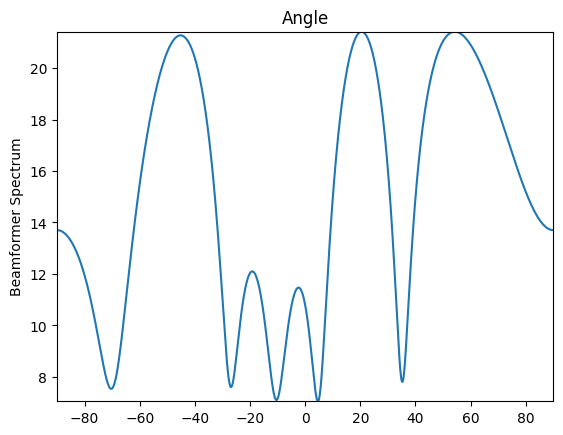

In [4]:
power, angles = doa.beamformer(Xn, 0.1, 1/2)
_, axs = plt.subplots()
plot(angles, power, axs, "Angle", "Beamformer Spectrum")

# CAPON - MVDR

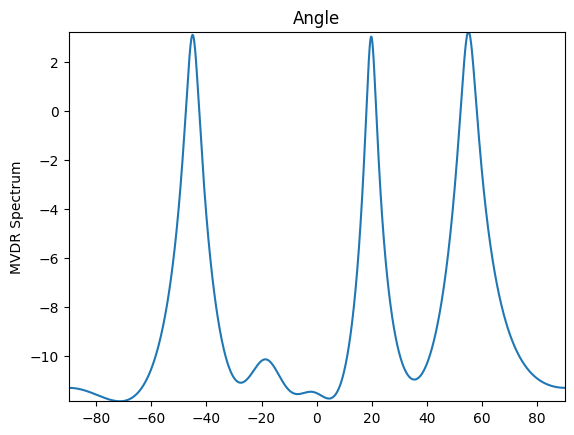

In [5]:
power, angles = doa.CAPON_MVDR(Xn, 0.1, 1/2)
_, axs = plt.subplots()
plot(angles, power, axs, "Angle", "MVDR Spectrum")

# MUSIC

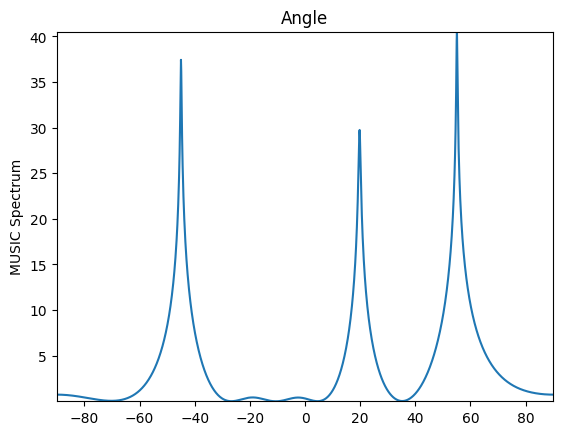

In [6]:
# Estimate the model order of the received signal
mo = moe.MDL(Xn, True)

power, angles = doa.MUSIC(Xn, mo, 0.1, 1/2)
_, axs = plt.subplots()
plot(angles, power, axs, "Angle", "MUSIC Spectrum")

# Min-Norm

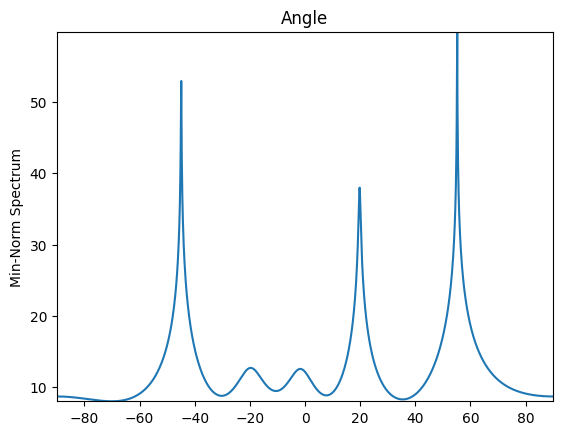

In [7]:
power, angles = doa.Min_Norm(Xn, mo, 0.1, 1/2)
_, axs = plt.subplots()
plot(angles, power, axs, "Angle", "Min-Norm Spectrum")

# ESPRIT

In [8]:
doa.ESPRIT(Xn, mo, 1 / 2)

(-44.91764980532489, 19.785498902990227, 55.168700485892515)

# Root-MUSIC

In [9]:
doa.Root_MUSIC(Xn, mo, 1 / 2)

(55.07647058891932, -44.99293024502073, 19.774247133136303)

# SAGE

In [10]:
doa.SAGE(Xn, mo, 0.01, 1 / 2)

(19.8500000000562, -44.89999999997693, 55.16000000007426)

# SML

In [11]:
# Resolution is made low here to allow for a faster estimation. Can be made better at the cost of increased runtime.
doa.SML(Xn, mo, resolution=5)

(55, -45, 20)

# DML

In [12]:
doa.DML(Xn, mo, resolution=5)

(55, -45, 20)